In [1]:
import numpy as np
import matplotlib.pyplot as plt
import verde as vd

In [2]:
region = (0, 3, -5, -4)
e, n = vd.scatter_points(region, 300, random_state=0)
eg, ng = vd.grid_coordinates(region, (50, 50))
model = lambda e, n: 5*np.sin(e**2)*np.cos(n**2)
data = model(e, n)
datag = model(eg, ng)

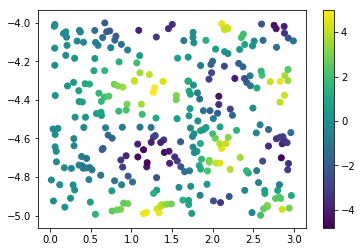

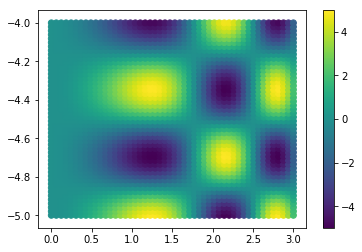

In [3]:
plt.figure()
plt.scatter(e, n, c=data)
plt.colorbar()
plt.figure()
plt.scatter(eg, ng, c=datag)
plt.colorbar()

In [12]:
grd = vd.ScipyGridder().fit(e, n, data)
grd

ScipyGridder(extra_args=None, method='cubic')

In [13]:
grid = grd.grid(region, (50, 50))
grid

<xarray.Dataset>
Dimensions:   (easting: 50, northing: 50)
Coordinates:
  * northing  (northing) float64 -5.0 -4.98 -4.959 -4.939 -4.918 -4.898 ...
  * easting   (easting) float64 0.0 0.06122 0.1224 0.1837 0.2449 0.3061 ...
Data variables:
    scalar    (northing, easting) float64 nan nan nan nan nan nan nan nan ...
Attributes:
    Generated by:  ScipyGridder(extra_args=None, method='cubic')

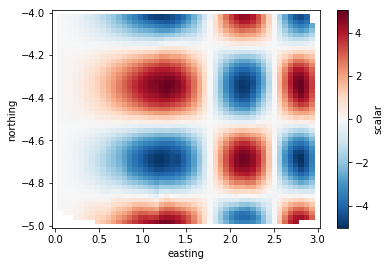

In [14]:
grid.scalar.plot.pcolormesh()

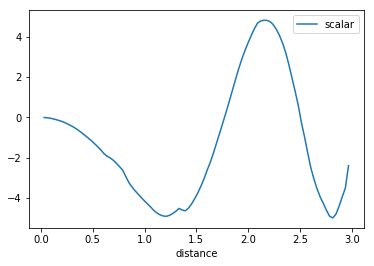

In [18]:
prof = grd.profile((0, -4.7), (3, -4.7), 100)
prof.plot('distance', 'scalar')